# Basic structure 

The main structure of the ObsPy library consists of the `Trace` and the `Stream` objects located inside the `obspy.core` package. The trace represents a single time series record of seismic data recorded at a single station or sensor. It's essentially a single waveform with associated metadata (e.g., station code, sampling frequency, starting time of the recording etc.). The stream is a container of one or more trace objects. Typically, a stream contains three recordings or traces: two with horizontal components (e.g., North-South and East-West) and one with a vertical component. Each trace offers several attributes that provide information about the recording and methods that apply a calculation on the respective recording. 

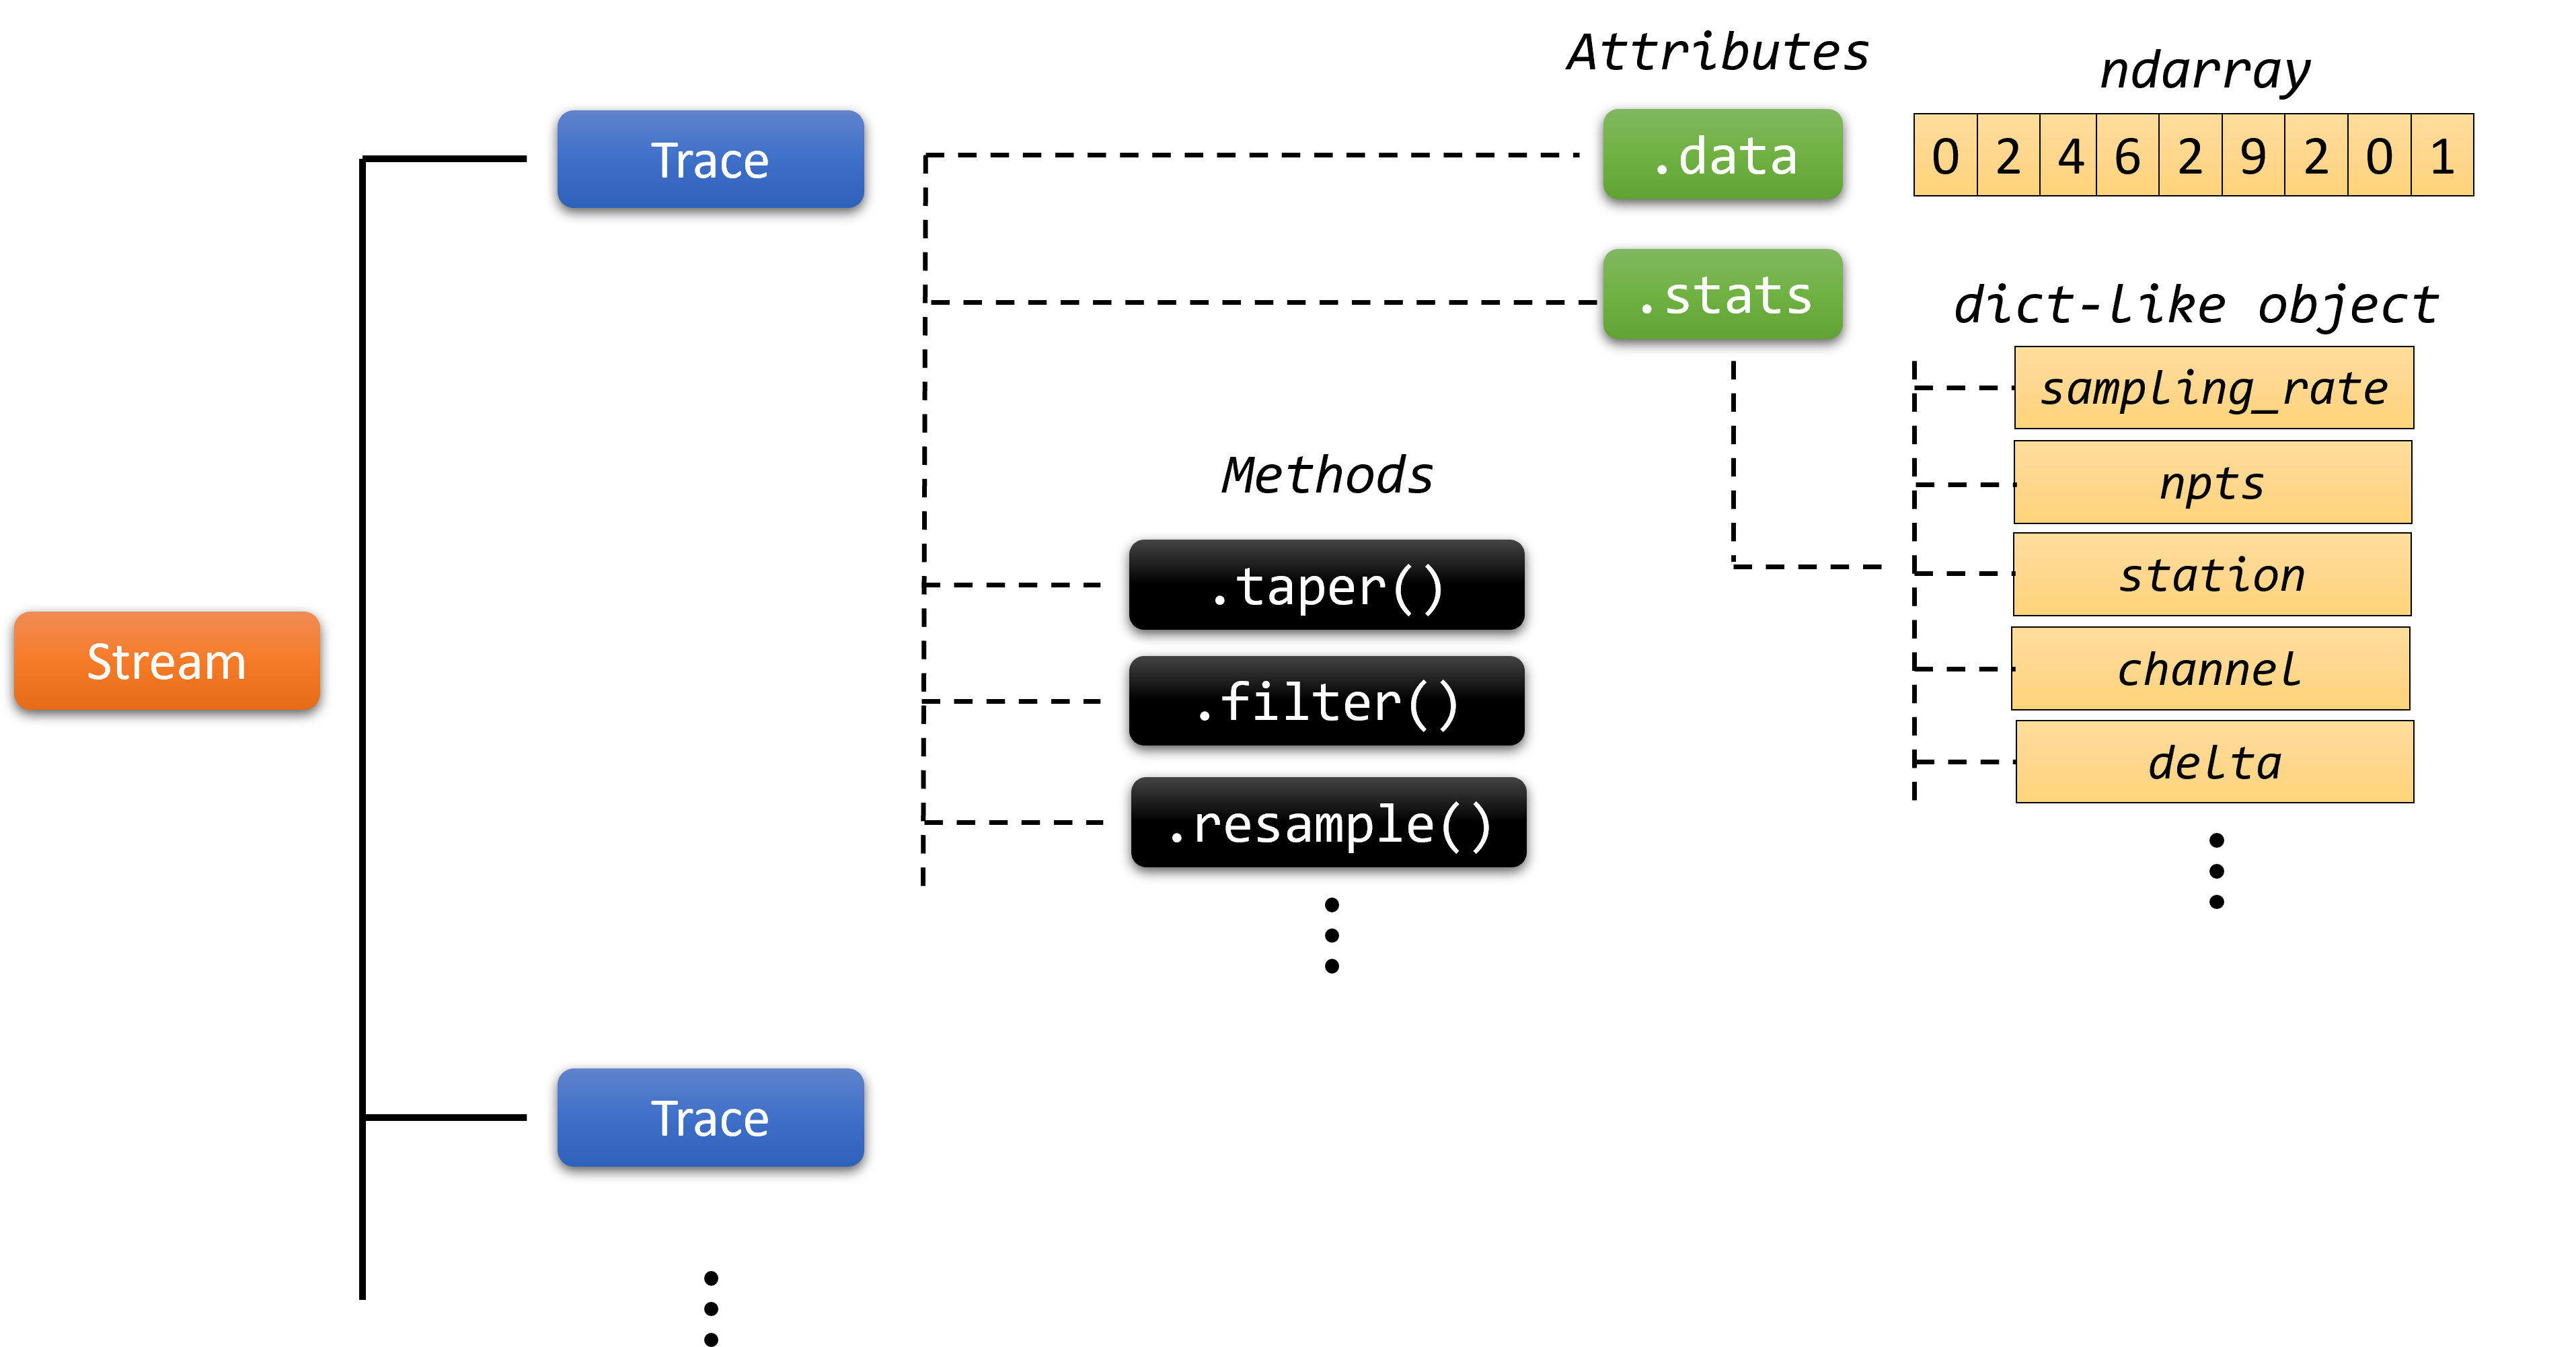

In [48]:
from IPython.display import Image
Image(filename='images/obspy-structure.png') 

For instance, the `.data` attribute of a trace provides its time series data samples and the `.stats` returns an object that holds metadata or seismic parameters associated with the trace, such as the sampling frequency, date and time of the first data sample, network, station, and other relevant information. In addition, the `filter()` method, filters the time series data within a specific frequency range and the `trim()` method cuts the time series between a specific start and end times. 

ObsPy supports several [file formats](https://docs.obspy.org/packages/autogen/obspy.core.stream.read.html) to read data. One of the most used seimic file format is the MiniSEED format. It is a binary file used to store time series data in a compact and efficient format that includes information about the station, location, timing, and the actual waveform data. MiniSEED files are widely used in seismology and are the standard format for sharing and archiving seismic data. 

Before we continue, start by initializing the functions that we will use throughout the rest of the tutorial: 

In [49]:
from obspy.core import read, UTCDateTime, Trace, Stream
import matplotlib.pyplot as plt
import pandas as pd

# ObsPy Date and Time Manipulation

ObsPy offers extensive support for date and time manipulation. It includes the [`UTCDateTime`](https://docs.obspy.org/packages/autogen/obspy.core.utcdatetime.UTCDateTime.html) object to represent date and time. For instance the starting and ending date and time of a recording, which are saved as *starttime* and *endtime* in the metadata information of a `Trace` object (in the `.stats` attribute), are both a `UTCDateTime` data type. 

One way to create a `UTCDateTime` object is by using a Python string: 

In [50]:
# create an ObsPy UTCDateTime object from a Python string
dt = UTCDateTime("2012-09-07T12:15:00")
print(dt, type(dt))

2012-09-07T12:15:00.000000Z <class 'obspy.core.utcdatetime.UTCDateTime'>


You can perform addition, subtraction and extract multiple attributes from this object using the dot notation: 

In [51]:
dt = UTCDateTime("2012-09-07T12:15:00")

# add 20 seconds
dt += 20
print(dt)                 

# get some datetime attributes             
print("dt.date -> ", dt.date)                
print("dt.time -> ", dt.time)               
print("dt.year -> ", dt.year)               
print("dt.month -> ", dt.month)               
print("dt.day -> ", dt.day)               
print("dt.hour -> ", dt.hour)              
print("dt.minute -> ", dt.minute)             
print("dt.second -> ", dt.second)             
print("dt.timestamp -> ", dt.timestamp)
print("dt.weekday -> ", dt.weekday)

2012-09-07T12:15:20.000000Z
dt.date ->  2012-09-07
dt.time ->  12:15:20
dt.year ->  2012
dt.month ->  9
dt.day ->  7
dt.hour ->  12
dt.minute ->  15
dt.second ->  20
dt.timestamp ->  1347020120.0
dt.weekday ->  4


Last but not least, one can subtract `UTCDateTime` objects and get the difference of them in seconds:

In [52]:
# create two UTCDateTime objects     
dt1 = UTCDateTime("2012-09-07T12:15:00") 
dt2 = UTCDateTime("2012-09-07T12:20:00")               
             
# calculate the difference of the two UTCDateTime objects           
diff = dt2 - dt1
print(diff)

300.0


The *starttime* and *endtime* keys in the header information of the recordings need to be in a `UTCDateTime` data type. Therefore, if you intend to modify these keys within the `trace.stats` dictionary-like header, convert your datetime string into the `UTCDateTime` format. 

# Attributes and Methods

Within ObsPy, you'll find an array of attributes and methods associated with the `Trace` class for accessing recording information, seismic file handling, and applying waveform processing techniques. To begin with, utilize the Obspy `read()` function to read a seismic file: 

In [53]:
st = read("20150724_095849_KRL1.mseed")
print(st)

3 Trace(s) in Stream:
.KRL1..E | 2015-07-24T09:58:49.000000Z - 2015-07-24T10:01:39.000000Z | 100.0 Hz, 17001 samples
.KRL1..N | 2015-07-24T09:58:49.000000Z - 2015-07-24T10:01:39.000000Z | 100.0 Hz, 17001 samples
.KRL1..Z | 2015-07-24T09:58:49.000000Z - 2015-07-24T10:01:39.000000Z | 100.0 Hz, 17001 samples


The file is a MiniSEED file. We can see the start and the end time of the record, the sampling frequency in Hz and the total samples. Let's get this information for the first trace of the stream object: 

In [54]:
# get the first trace
first_trace = st.traces[0]

# output the header information of that trace object
print(first_trace.stats)

         network: 
         station: KRL1
        location: 
         channel: E
       starttime: 2015-07-24T09:58:49.000000Z
         endtime: 2015-07-24T10:01:39.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 17001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 34, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 417792})


We can observe multiple key-value pairs that contain the seismic parameters, such as the station name, the component of the record and the sampling frequency or sampling rate. Several other parameters are also apparent like the starting and the ending date and time of the record (*starttime*, *endtime*), the sample distance in seconds (*dt*), the total number of sample points (*npts*) and more. The output is a [`Stats`](https://docs.obspy.org/packages/autogen/obspy.core.trace.Stats.html) object which is a dict-like object that you can get and set the values. 

In order to check the traces visually, get the sample data and the time information of the recordings using the `.data` attribute and the `.times()` method respectively, and plot them using the Matplotlib Python library. 

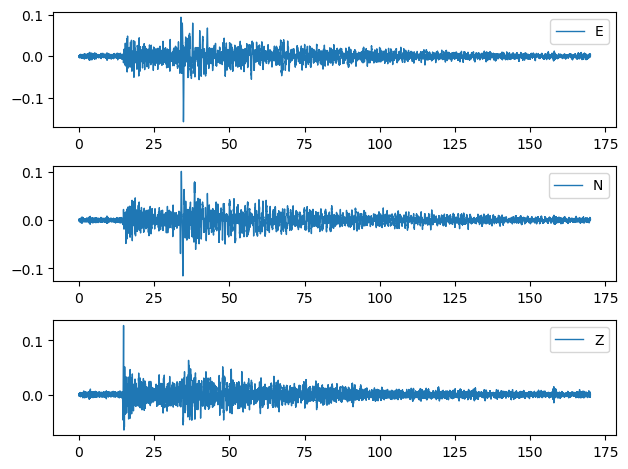

In [55]:
# Initialize a matplotlib figure and axes
# set the figure rows equal to the total number of traces calculated from the length of the stream, len(st)
fig, ax = plt.subplots(len(st), 1)

# Loop through all the traces in the stream object (st)
for n, tr in enumerate(st):
    # get the time information of the current trace
    xdata = tr.times()
    
    # get the data of the current trace
    ydata = tr.data
    
    # plot the graph with legend, the trace channel or component
    ax[n].plot(xdata, ydata, label=tr.stats.channel, lw=1)
    
    # add the legend on the plot
    ax[n].legend()
    
# adjust the subplots so that they do not overlap
plt.tight_layout()

We could achieve a similar result by just using the [`st.plot()`](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.plot.html) method of the `Stream` object: 

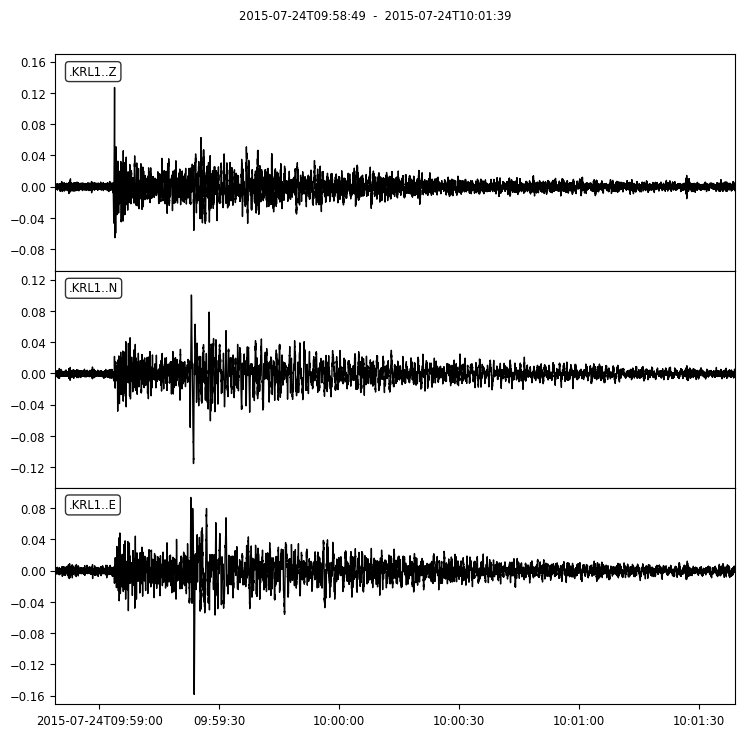

In [56]:
st.plot();

This method can get some parameters to control the styling of the plots such as the color of the waveforms, the size of the plot, the rotation and size of the x axis labels and more. 

In addition, the `Trace` object includes several methods that apply a specific calculation on the time series of the recording. For example, apply a bandpass filter at the previous recordings using the ObsPy [`filter()`](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.filter.html) method:

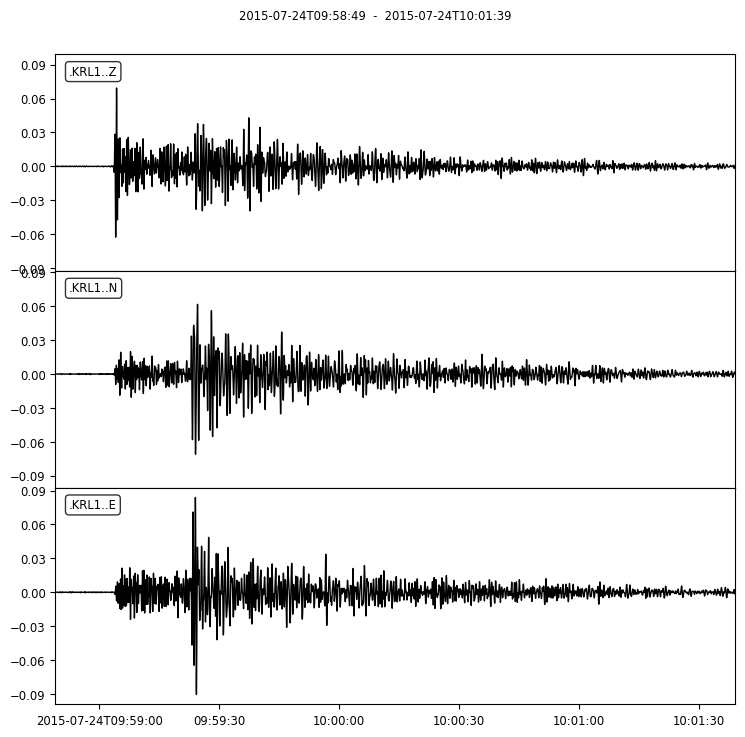

In [57]:
st.filter('bandpass', freqmin=1, freqmax=3)

st.plot();

These computations can be applied on the `Stream` object at once, or at each trace of the stream, individually. For instance, trim each recordings to get a specific part of the waveforms:

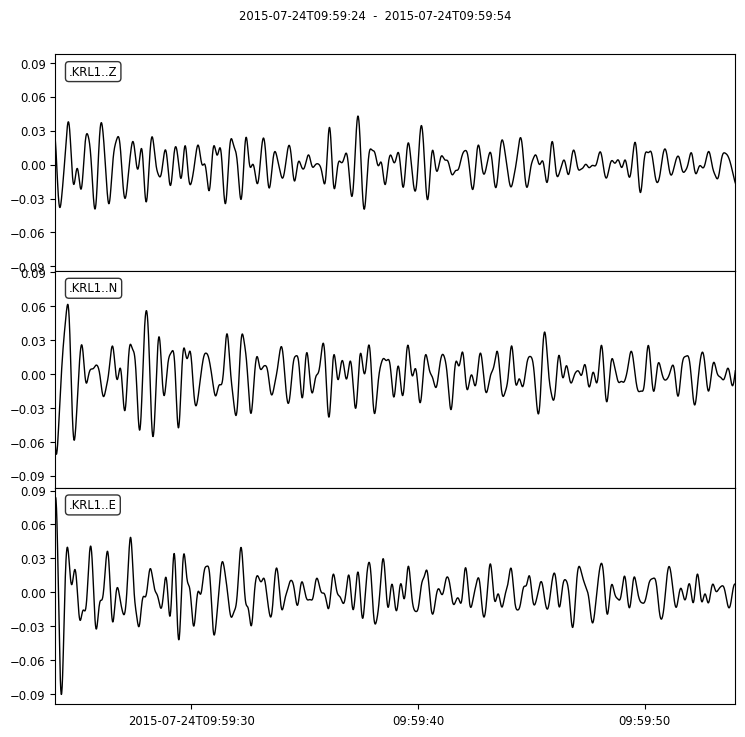

In [58]:
# get the start date of the first record
startdt = st.traces[0].stats.starttime

# loop through the traces of the stream and trim each one separately
for tr in st:
    trim_left_limit = 35 # seconds 
    trim_right_limit = 65 # seconds
    tr.trim(starttime=startdt+trim_left_limit, endtime=startdt+trim_right_limit)

st.plot();

These computations occur *in-place*, meaning they directly modify the existing object rather than returning a new one. Create a copy of it using the `.copy()` method to create a new object if you don't want to change it.

Lastly, save the trimmed Stream object on your local hard drive using the Stream `.write()` method: 

Lastly, use the `.write()` method of the `Stream` object to save a stream object on your local hard drive. Pass a file path as a parameter in the function to save it at a specific location.

In [59]:
# save to a file
st.write('trimmed_mseed.mseed')

# Create trace and stream objects from raw data

In addition to reading seismological file formats, you have the flexibility to create your own trace and stream using ObsPy's `Trace` and `Stream` classes. To create a trace object, begin by supplying the data values of the recording (e.g., acceleration) as a NumPy `ndarray` to the `data` parameter within the `Trace` class, and include the recording's metadata in a Python dictionary provided to the `header` parameter. Do this for each trace you want to create. Then, gather all the generated `Trace` objects into a Python list and pass it into the `traces` parameter in the `Stream` class to construct a stream.

Below we present a *.txt* file, containing seismic data. This data file includes metadata information positioned at the file's header, followed by data for each component. Our goal is to read this file and assemble a `Stream object` comprising three individual traces. 

![Acceleration data in raw ASCII format. The first lines contain the record metadata and the rest of the lines the acceleration data of the three components](images/record-txt-file.png)

Start by reading the file and collecting the file header information in order to build a Python dictionary of the seismic parameters. Don't forget to convert the number of points (*npts*) into a Python `int` datatype, the sampling frequency (*fs*) into a `float` datatype and the start date and time of the record (*starttime*) into a `UTCDateTime` object. Also it is important for the keys of the dictionary, to be one of the options provided in the [ObsPy trace stats](https://docs.obspy.org/packages/autogen/obspy.core.trace.Stats.html): 

In [60]:
# open the file and read its metadata
with open('20130809_041940_ZAK2_data.txt') as fr:
    # skip the first line
    fr.readline()

    # read the station name
    station = fr.readline().split(':')[1].strip()

    # read the starting date of the record
    dt_start = fr.readline().split(':', 1)[1].strip()

    # read the sampling frequency in Hz
    fs =  fr.readline().split(':')[1].strip(' Hz\n')

    # read the number of sample points
    npts = fr.readline().split(':')[1].strip()

    # skip 2 lines
    fr.readline()
    fr.readline()

    # read the components
    compos = fr.readline().split(':')[1].split()
    
dict_header = {
    "station": station,
    "npts": int(npts),
    "sampling_rate": float(fs),
    "starttime": UTCDateTime(dt_start),
}

print(dict_header)

{'station': 'ZAK2', 'npts': 21100, 'sampling_rate': 100.0, 'starttime': UTCDateTime(2013, 8, 9, 4, 19, 40)}


hen we use the python *Pandas* library to read the acceleration values of the traces: 

In [61]:
# use the Pandas read-csv method to read the data from text file
# read the file again and skip some rows to get the data columns
df_data = pd.read_csv('20130809_041940_ZAK2_data.txt', skiprows=10, sep='\s+', header=None)

# assign the previous components list into the columns
df_data.columns = compos

At this time we have the metadata and the data of the traces. Using these two parameters of each trace, we can create the `Stream` object. To do this, loop trough the components (each component represent a trace), add the respective component to the previously created header information, and lastly ass the header and the data into the `Trace` object:

In [62]:
# create an empty list to append each trace object
lt_traces = []

# then create a trace for each component
for compo in compos:
    # create a dictionary object and add metadata
    dict_header["channel"] = compo

    # create the trace object
    # don't forget to convert the data into numpy ndarray
    tr = Trace(data=df_data[compo].to_numpy(), header=dict_header)

    # append the trace into the traces list
    lt_traces.append(tr)

Finally, create the `Stream` object, from the list of the traces

In [63]:
# create the stream by inserting the list of traces into the Stream class
st = Stream(lt_traces)

print(st)

3 Trace(s) in Stream:
.ZAK2..E | 2013-08-09T04:19:40.000000Z - 2013-08-09T04:23:10.990000Z | 100.0 Hz, 21100 samples
.ZAK2..N | 2013-08-09T04:19:40.000000Z - 2013-08-09T04:23:10.990000Z | 100.0 Hz, 21100 samples
.ZAK2..Z | 2013-08-09T04:19:40.000000Z - 2013-08-09T04:23:10.990000Z | 100.0 Hz, 21100 samples


Let's also visualize the waveforms:

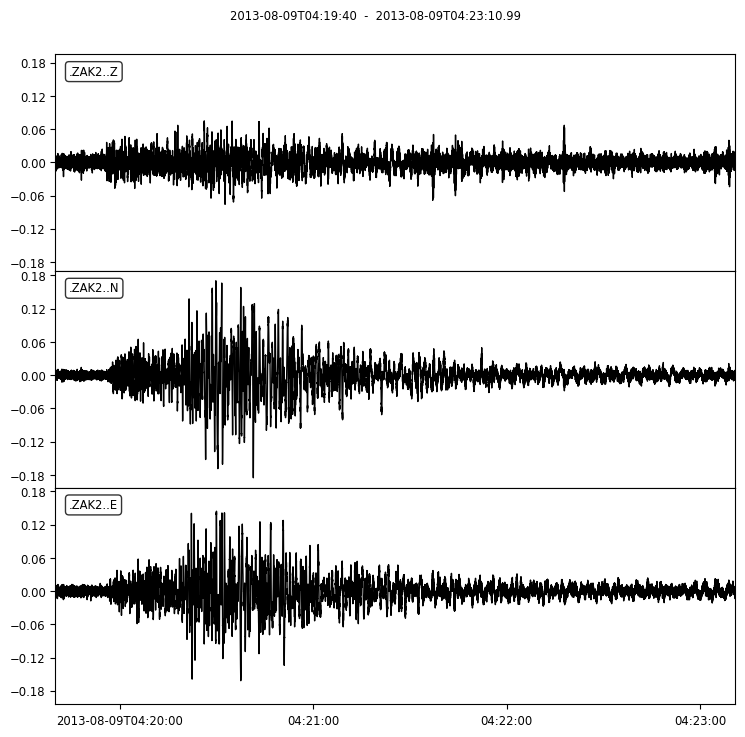

In [64]:
st.plot();

If you require additional information about the ObsPy library, please refer to the [documentation](https://docs.obspy.org/). 